# Predicting Insurance Costs

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

From columns we see age, sex, bmi, children, smoker and region are independent variables while charges (i.e. insurance costs) is the dependent variable.

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

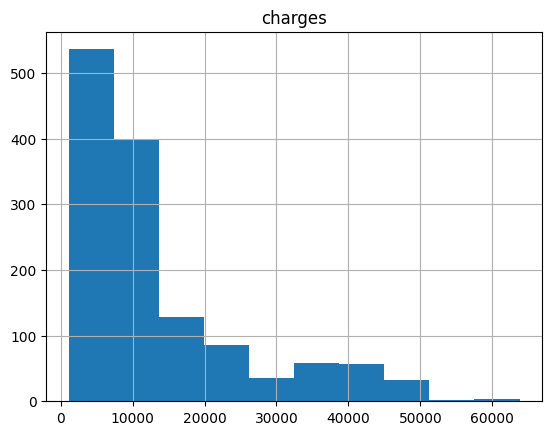

In [3]:
insurance.hist('charges')

## Correlation matrix

In [5]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Note: Age has ~30% correlation, while bmi has ~20% and children has the lowest at ~7%.

## Relationship between sex, smoker, region and charges

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

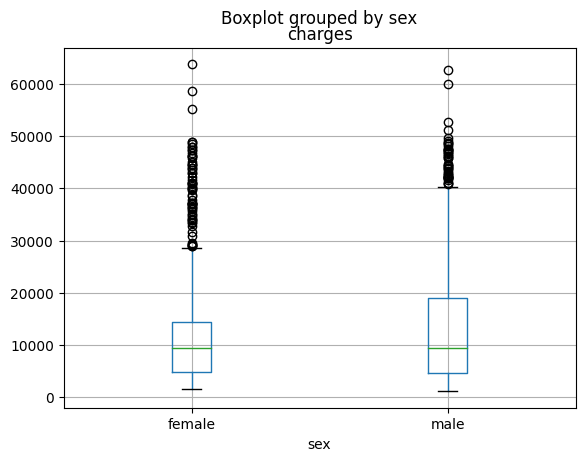

In [33]:
insurance.boxplot(column=['charges'], by='sex')

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

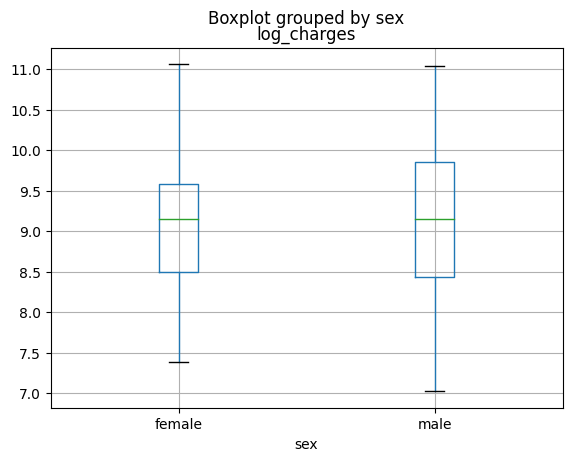

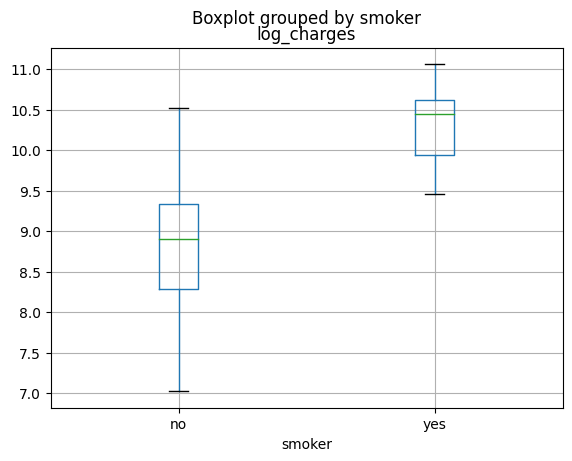

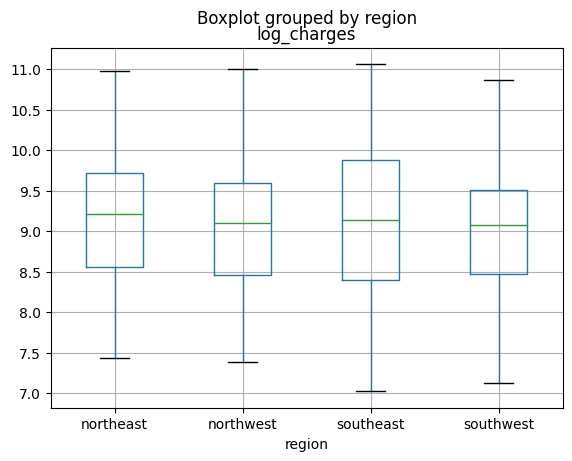

In [39]:
#Easier to read in log-form
insurance['log_charges'] = np.log(insurance["charges"])
insurance.boxplot(column=['log_charges'], by='sex')
insurance.boxplot(column=['log_charges'], by='smoker')
insurance.boxplot(column=['log_charges'], by='region')

From the boxplots, male clients appear to have a wider spread of insurance charges compared to women on average. Additionally, smokers have noticeably higher costs than non-smokers with a smaller range. On the other hand, there is little discernable regional differences in insurance charges. In sum, smoking is likely to be the best predictor of insurance costs out of the three, i.e. there is a visibly significant positive relationship between smoking and insurance costs.

## Constructing the model

In [40]:
#split the data into training and testing sets
insurance['is_smoker'] = (insurance['smoker']=='yes')
X = insurance[['age', 'bmi', 'is_smoker']]
y = insurance['log_charges'] #easier to deduce proportional effects in log-form
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
#training model and evaluating performance
insurance_model  = LinearRegression()
insurance_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = insurance_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.2171090804614031

In [42]:
np.exp(mse) #original scale

1.2424796249969603

In [43]:
r2_score(y_train, y_pred) #coeff of determination

0.7401147505859649

After training the model, MSE is 0.217 (or 1.24 on original scale). Also, the R-squared value of 74% gives reasonable confidence the model explains the majority of variation in log-charges.

## Residual Diagnostics

<AxesSubplot:xlabel='fitted', ylabel='residuals'>

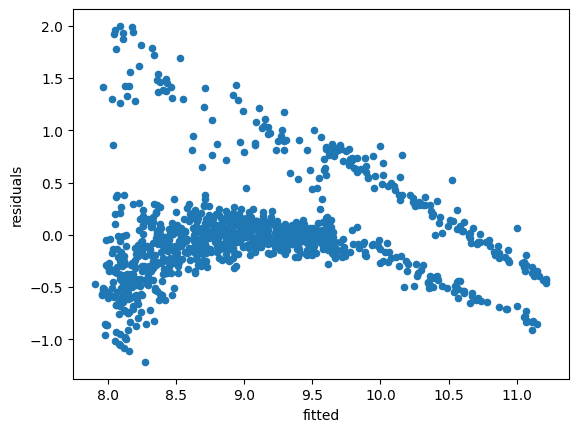

In [44]:
check = pd.DataFrame()
check['residuals'] = y_train - y_pred
check['fitted'] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")

There is a downward trend in residuals as fitted values increase. This violates the Gauss-Markov assumptions of linear regression that residuals average around 0.

## Interpreting the model

In [45]:
insurance_model.coef_

array([0.03454609, 0.00986177, 1.53745151])

* A year increase in the age of the client is associated with a 0.035 increase in the log charges, holding smoking status and BMI constant (about a 3.5% increase in the charges on the regular scale).
* A unit increment in the client's BMI is associated with a 0.010 increase in log charges, holding smoking status and age constant (1.0% increase on the regular scale).
* Being a smoker is associated with a 1.54 increase in log charges, holding age and BMI constant (a 466% increase in charges on the regular scale).
Note: we are not concerned about if these changes are statistically significant, so we don't know if these associations are truly non-zero. Our primary goal is prediction.

## Final model evaluation

In [46]:
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.21124613188225233

In [47]:
np.exp(mean_squared_error(y_test, test_pred))

1.2352163437728845

## Drawing conclusions

The test MSE was about 0.217, while the training MSE was about 0.211. In this case, the two errors match up pretty well (1.242 vs 1.235), so we can conclude that the model is not overfit. The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.